# Travel Package Purchase Prediction - Problem Statement

#### Submission : Ranjan Mitra

# Context:

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.


# **Objective:**

To predict which customer is more likely to purchase the newly introduced travel package.

# **Data Description:**
Customer details:

CustomerID: Unique customer ID
ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
Age: Age of customer
TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
Occupation: Occupation of customer
Gender: Gender of customer
NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
PreferredPropertyStar: Preferred hotel property rating by customer
MaritalStatus: Marital status of customer
NumberOfTrips: Average number of trips in a year by customer
Passport: The customer has a passport or not (0: No, 1: Yes)
OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
Designation: Designation of the customer in the current organization
MonthlyIncome: Gross monthly income of the customer
Customer interaction data: 

PitchSatisfactionScore: Sales pitch satisfaction score
ProductPitched: Product pitched by the salesperson
NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
DurationOfPitch: Duration of the pitch by a salesperson to the customer
Note:

Please note XGBoost can take a significantly longer time to run, so if you have time complexity issues then you can avoid tuning XGBoost. No marks will be deducted if XGBoost tuning is not attempted.

### Note: The first section of the notebook is the section that has been covered multiple times in the previous case studies.  For this discussion, this part can be skipped and we can directly refer to this **<a href = #link1>summary</a>** of observations from EDA.

## Overview of the dataset 

**Let's start by importing libraries we need.**

In [339]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn import tree
! pip install xgboost
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
%autosave 15

Autosaving every 15 seconds


In [2]:
#Loading dataset
data=pd.read_excel("Tourism.xlsx",sheet_name=1)

**View the first 5 rows of the dataset.**

In [3]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


**Check data types and number of non-null values for each column.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

- We can see that there are total of 19 columns and 4888 rows in the dataset.
- The number of non-null values of each column is equal to the number of total rows in the dataset i.e. no null value. We can further confirm this using `isna()` method.

In [5]:
data.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

- There are no missing values in the data.

**Summary of the dataset**

In [6]:
# filtering object type columns
cat_columns = data.describe(include=["object"]).columns
cat_columns


Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [7]:
# filtering continous type columns
cont_columns = data.describe(include=["float64","int64"]).columns
cont_columns

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

In [8]:
#filtering continous columns which are missing values
data[cont_columns].isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
CityTier                      0
DurationOfPitch             251
NumberOfPersonVisiting        0
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64

In [9]:
# Summary of continuous columns
data[['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome']].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


- The DurationOfPitch is highly right skewed and may have some outliers.
- The NumberOfTrips is highly right skewed and may have some outliers.

In [10]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

**Number of unique values in each column**

In [11]:
df.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         2
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

- We can drop 'CustomerID' column as it is an ID variable and will not add value to the model.

In [12]:
#Dropping CustomerID columns from the dataframe
df.drop(columns=['CustomerID'], inplace=True)
# let us reset the dataframe index
df.reset_index(inplace=True, drop=True)

In [13]:
#filtering categorical columns which are missing values
# filtering object type columns
# #filtering object type columns which are missing values
cat_columns = df.describe(include=["object"]).columns
cat_columns
df[cat_columns].isna().sum()

TypeofContact     25
Occupation         0
Gender             0
ProductPitched     0
MaritalStatus      0
Designation        0
dtype: int64

#### We will fill the missing values in the TypeofContact column with 'Other', as the exact values for that category are not known

In [14]:
df.TypeofContact.fillna("Others", inplace=True) 

In [15]:
## Checking the Values on unique values for TypeofContact
df.TypeofContact.value_counts()

Self Enquiry       3444
Company Invited    1419
Others               25
Name: TypeofContact, dtype: int64

In [16]:
# filtering continous type columns
# filtering continous type columns
# #filtering continous type columns which are missing values
cont_columns = df.describe(include=["float64","int64"]).columns
cont_columns
df[cont_columns].isna().sum()

ProdTaken                     0
Age                         226
CityTier                      0
DurationOfPitch             251
NumberOfPersonVisiting        0
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64

- Columns Age ,DurationofPitch, NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome   have missing values and needs to be imputed
- We will Impute Age ,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar with median 


In [17]:
## Checking the summary statistics of all continous variables before imputing
df[[ 'Age',  'DurationOfPitch','NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips','NumberOfChildrenVisiting', 'MonthlyIncome']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


**Number of observations in each category**

In [18]:
## Create a copy of the DF before imputing values
df1=df.copy()
df1[[ 'Age',  'DurationOfPitch','NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips','NumberOfChildrenVisiting', 'MonthlyIncome']] =df[[ 'Age',  'DurationOfPitch','NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips','NumberOfChildrenVisiting', 'MonthlyIncome']].transform(lambda x: x.fillna(x.median()))
df1.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [19]:
df1.isnull().values.any() # If there are any null values in data set

False

## Univariate Analysis

In [20]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4888 non-null   float64
 2   TypeofContact             4888 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4888 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4888 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4888 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4888 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

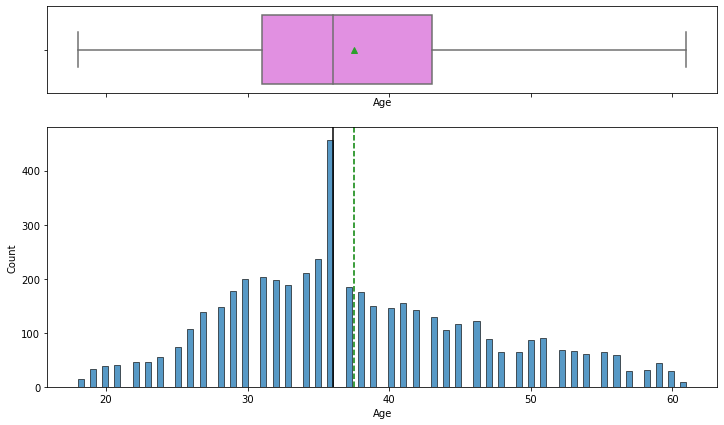

In [22]:
histogram_boxplot(df1, "Age", bins=100)

- Age seems to be normal distributed

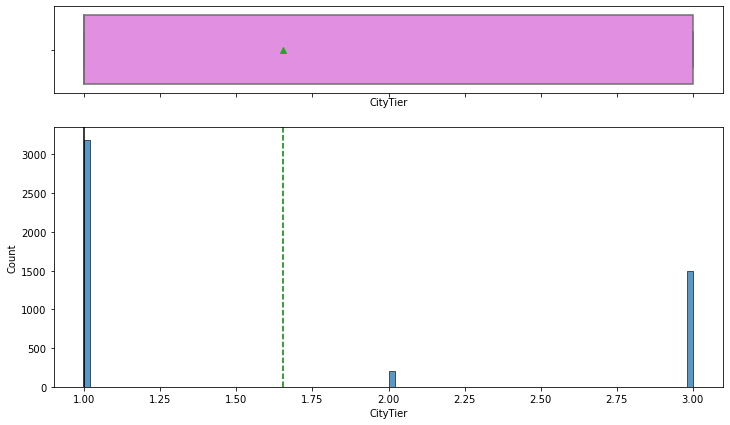

In [23]:
histogram_boxplot(df1, "CityTier", bins=100)

- The Tier 1 cities has the highest count folows by Tier 3

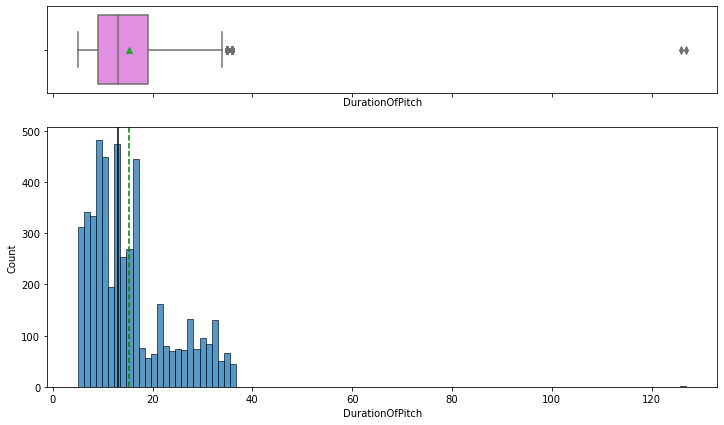

In [24]:
histogram_boxplot(df1, "DurationOfPitch", bins=100)

- The distribution is right skewed and may need correction

#### Generating log transformation on column lg_DurationOfPitch to fcorrect the skewness in the distribution

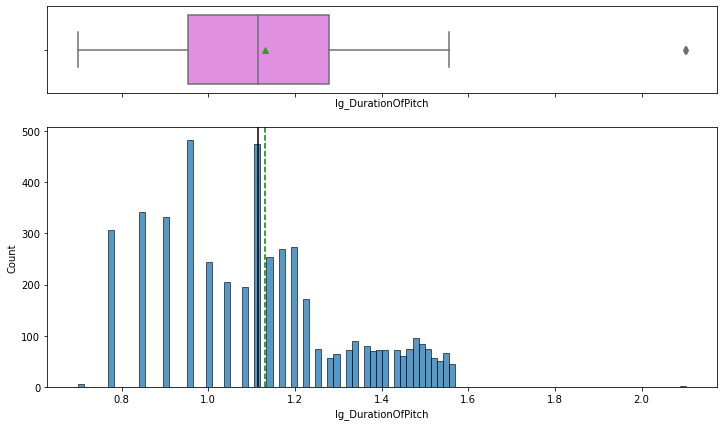

In [25]:
## generating log transformation on column lg_DurationOfPitch to fcorrect the skewness in the distribution 
df1['lg_DurationOfPitch']=np.log10(df1['DurationOfPitch'])
histogram_boxplot(df1, "lg_DurationOfPitch", bins=100)

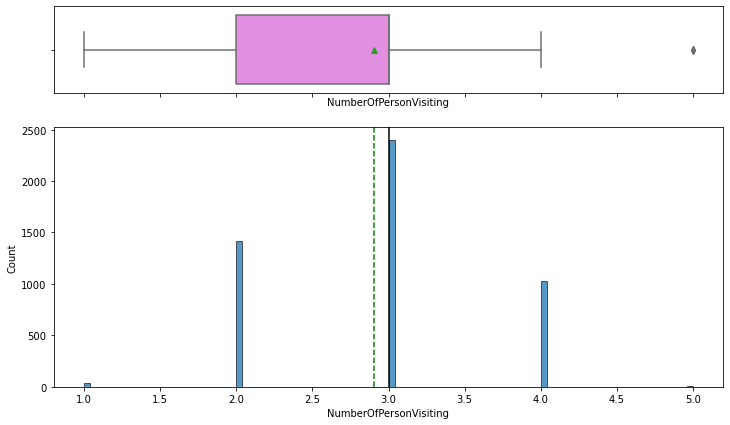

In [26]:
histogram_boxplot(df1, "NumberOfPersonVisiting", bins=100)

- The distribution of NumberOfPersonVisiting is slighty right-skewed
- The boxplot shows that there are outliers at the right end
- We will not treat these outliers as they represent the real market trend/data

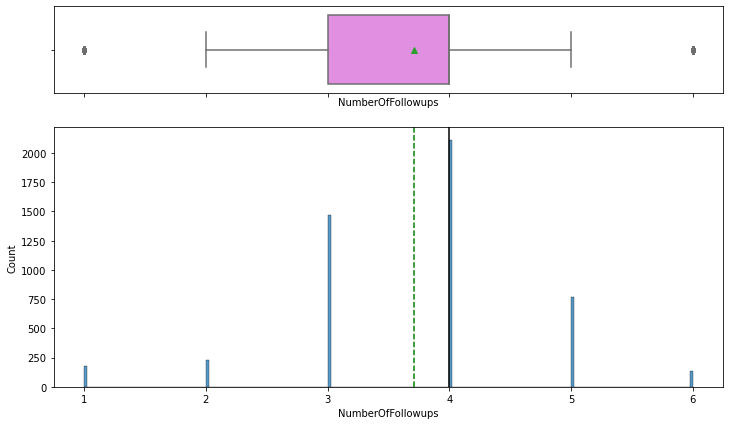

In [27]:
histogram_boxplot(df1, "NumberOfFollowups", bins=200)

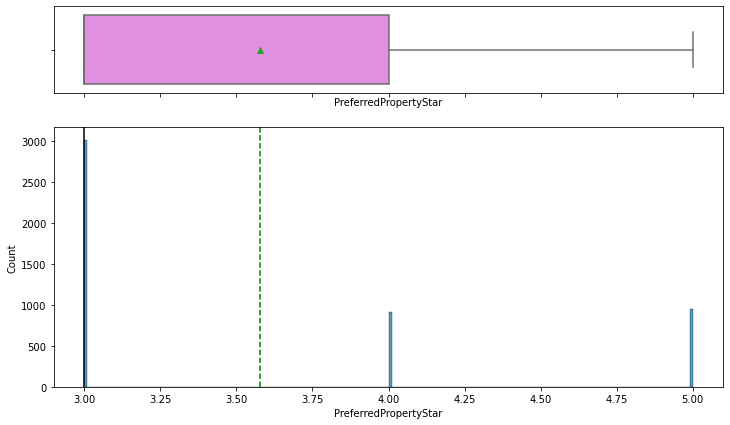

In [28]:
histogram_boxplot(df1, "PreferredPropertyStar", bins=200)

- The distribution shows that 3 star hotels are mostly preferred followed by 5 and 4 stars.

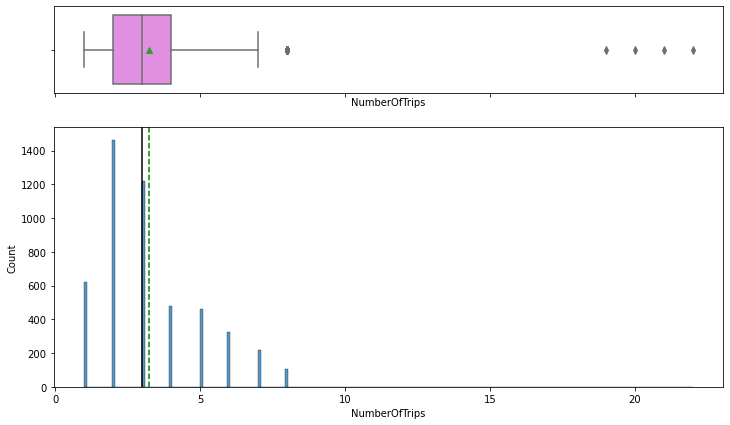

In [29]:
histogram_boxplot(df1, "NumberOfTrips", bins=200)

- The distribution of NumberOfTrips is slighty right-skewed
- The boxplot shows that there are outliers at the right end
- We will not treat these outliers as they represent the real market trend/data

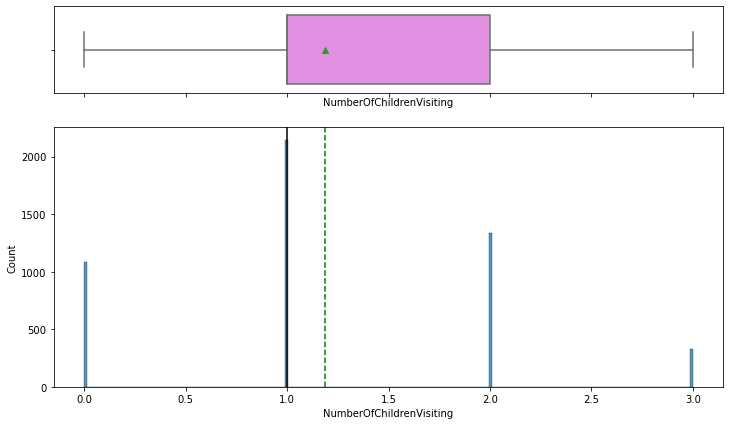

In [30]:
histogram_boxplot(df1, "NumberOfChildrenVisiting", bins=200)

In [31]:
#Top 5 highest Target variable values 
data['ProdTaken'].nlargest()

0     1
2     1
14    1
21    1
24    1
Name: ProdTaken, dtype: int64

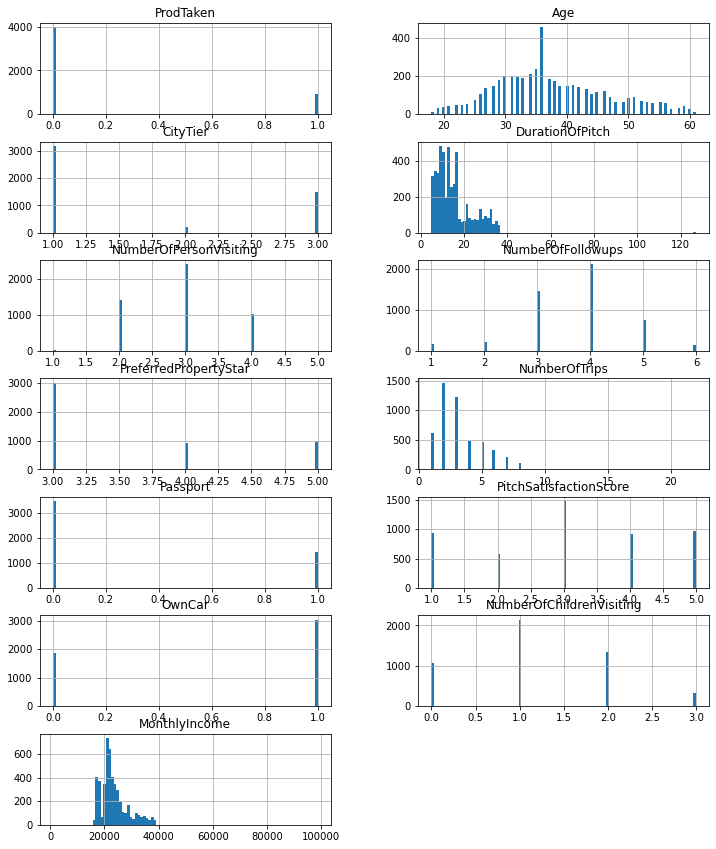

In [32]:
## Alternative technique of just observing the distributions

columns = list(df1)[0:-1] # Excluding Outcome column which has only 
cont_columns = df.describe(include=["float64","int64"]).columns
df1[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

In [33]:
## cat_cols=['season','yr','holiday','workingday','weathersit']

cat_columns = df1.describe(include=["object"]).columns
for column in cat_columns:
    print(df1[column].value_counts())
    print('-'*30)

Self Enquiry       3444
Company Invited    1419
Others               25
Name: TypeofContact, dtype: int64
------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------
Male      2916
Female    1972
Name: Gender, dtype: int64
------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------------------------
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
------------------------------
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
------------------------------


In [64]:
## Adding a new column type boolean as target column
df1['ProdTaken_bol'] = df1['ProdTaken'].astype('bool')

In [65]:
df1.sample(10)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,lg_DurationOfPitch,ProdTaken_bol
2541,0,29.0,Company Invited,3,11.0,Small Business,Male,3,4.0,Deluxe,...,Divorced,3.0,0,2,1,1.0,Manager,22899.0,1.041393,False
387,0,40.0,Self Enquiry,3,8.0,Small Business,Female,2,3.0,Deluxe,...,Married,1.0,0,2,0,1.0,Manager,20715.0,0.903090,False
1227,0,36.0,Self Enquiry,1,8.0,Salaried,Male,3,3.0,Basic,...,Married,2.0,0,5,0,2.0,Executive,18477.0,0.903090,False
3607,0,38.0,Self Enquiry,1,17.0,Small Business,Female,4,4.0,Basic,...,Married,3.0,0,1,1,1.0,Executive,22614.0,1.230449,False
702,0,30.0,Self Enquiry,3,14.0,Salaried,Male,3,3.0,Standard,...,Married,6.0,0,3,1,0.0,Senior Manager,22264.0,1.146128,False
1063,0,29.0,Self Enquiry,3,25.0,Salaried,Male,3,4.0,Deluxe,...,Married,2.0,0,4,1,0.0,Manager,23620.0,1.397940,False
3283,0,43.0,Self Enquiry,3,11.0,Small Business,Male,3,4.0,Deluxe,...,Unmarried,2.0,0,5,1,2.0,Manager,23833.0,1.041393,False
1832,0,21.0,Company Invited,3,15.0,Small Business,Male,2,3.0,Basic,...,Single,2.0,0,4,1,0.0,Executive,17610.0,1.176091,False
1777,0,38.0,Self Enquiry,1,31.0,Salaried,Female,2,4.0,Standard,...,Married,4.0,0,3,0,1.0,Senior Manager,27061.0,1.491362,False
1035,0,31.0,Self Enquiry,2,14.0,Small Business,Female,3,1.0,Basic,...,Single,1.0,0,1,0,2.0,Executive,17109.0,1.146128,False


## EDA

**Function to create barplots that indicate percentage for each category**

In [66]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

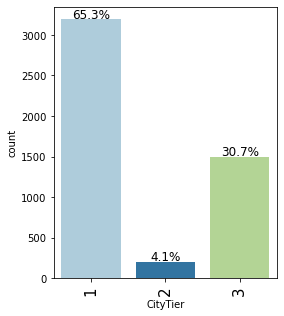

In [37]:
labeled_barplot(df1, "CityTier",perc=True)

- Tier1 citis are 65% followed by Tier2 30.7% for the data

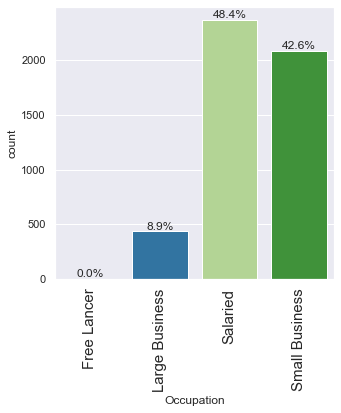

In [67]:
labeled_barplot(df1,'Occupation',perc=True)

- Salaried with 48.4% & Small business customers with 42.6% has the second highest from the observations. 

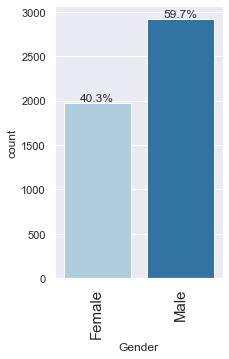

In [68]:
labeled_barplot(df1,'Gender',perc=True)

- Male customer are more with 59.7% for the observations.

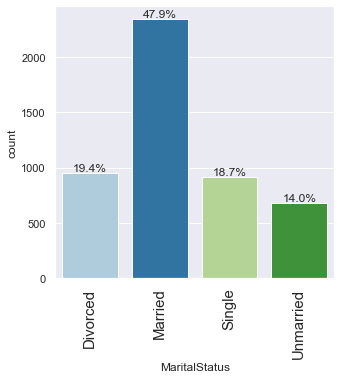

In [69]:
labeled_barplot(df1,'MaritalStatus',perc=True)

- Married Customers has the highest population with 47.9% followed by Divorced with 19.4% of the observations.

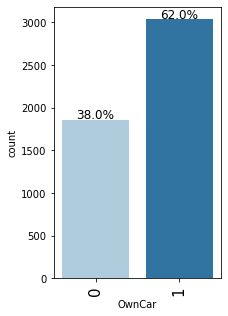

In [41]:
labeled_barplot(df1,'OwnCar',perc=True)

- Customers owning a car is more with 62% of the observations.

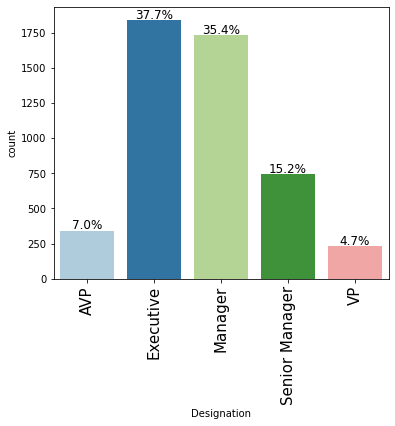

In [42]:
labeled_barplot(data,'Designation',perc=True)

- Customers who are Executives has the highest population with 37.7% observations
- Customers who are Managers has the second highest population with 35.4% observations

### Bivariate analysis

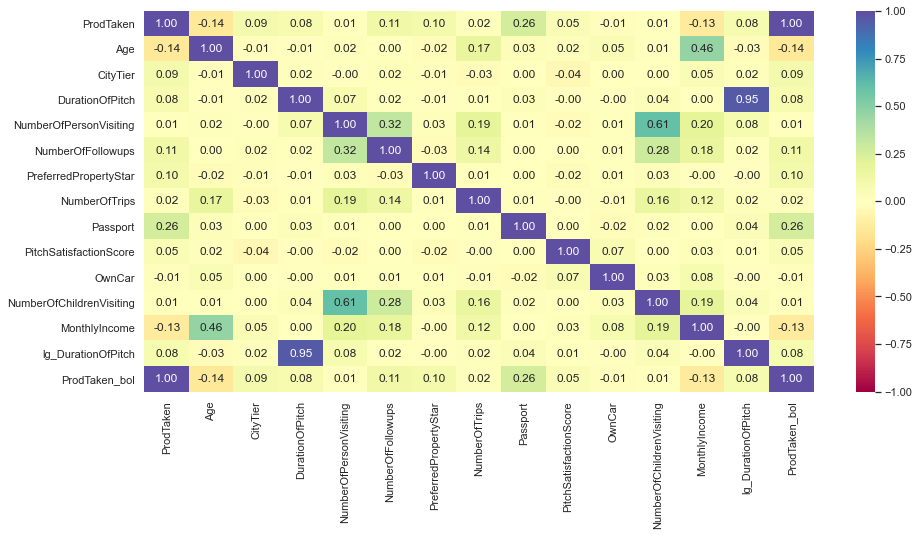

In [44]:
plt.figure(figsize=(15, 7))
sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

-  Based on the heatmap there is high correlation between
      - NumberOfPersonVisiting and NumberOfChildrenVisiting
      - Age and Monthlyincome


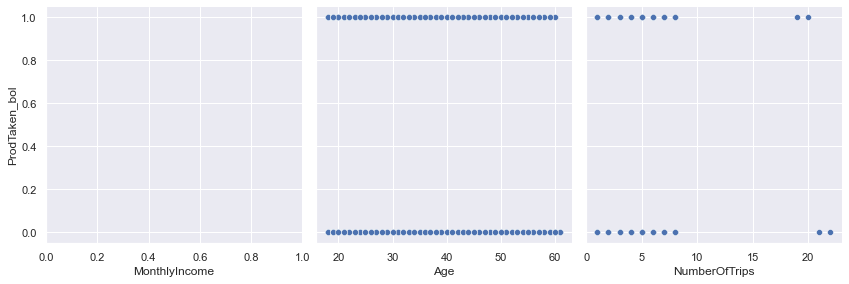

In [70]:
sns.pairplot(
    df1,
    x_vars=["MonthlyIncome", "Age", "NumberOfTrips"],
    y_vars=["ProdTaken_bol"],
    height=4,
    aspect=1
    );

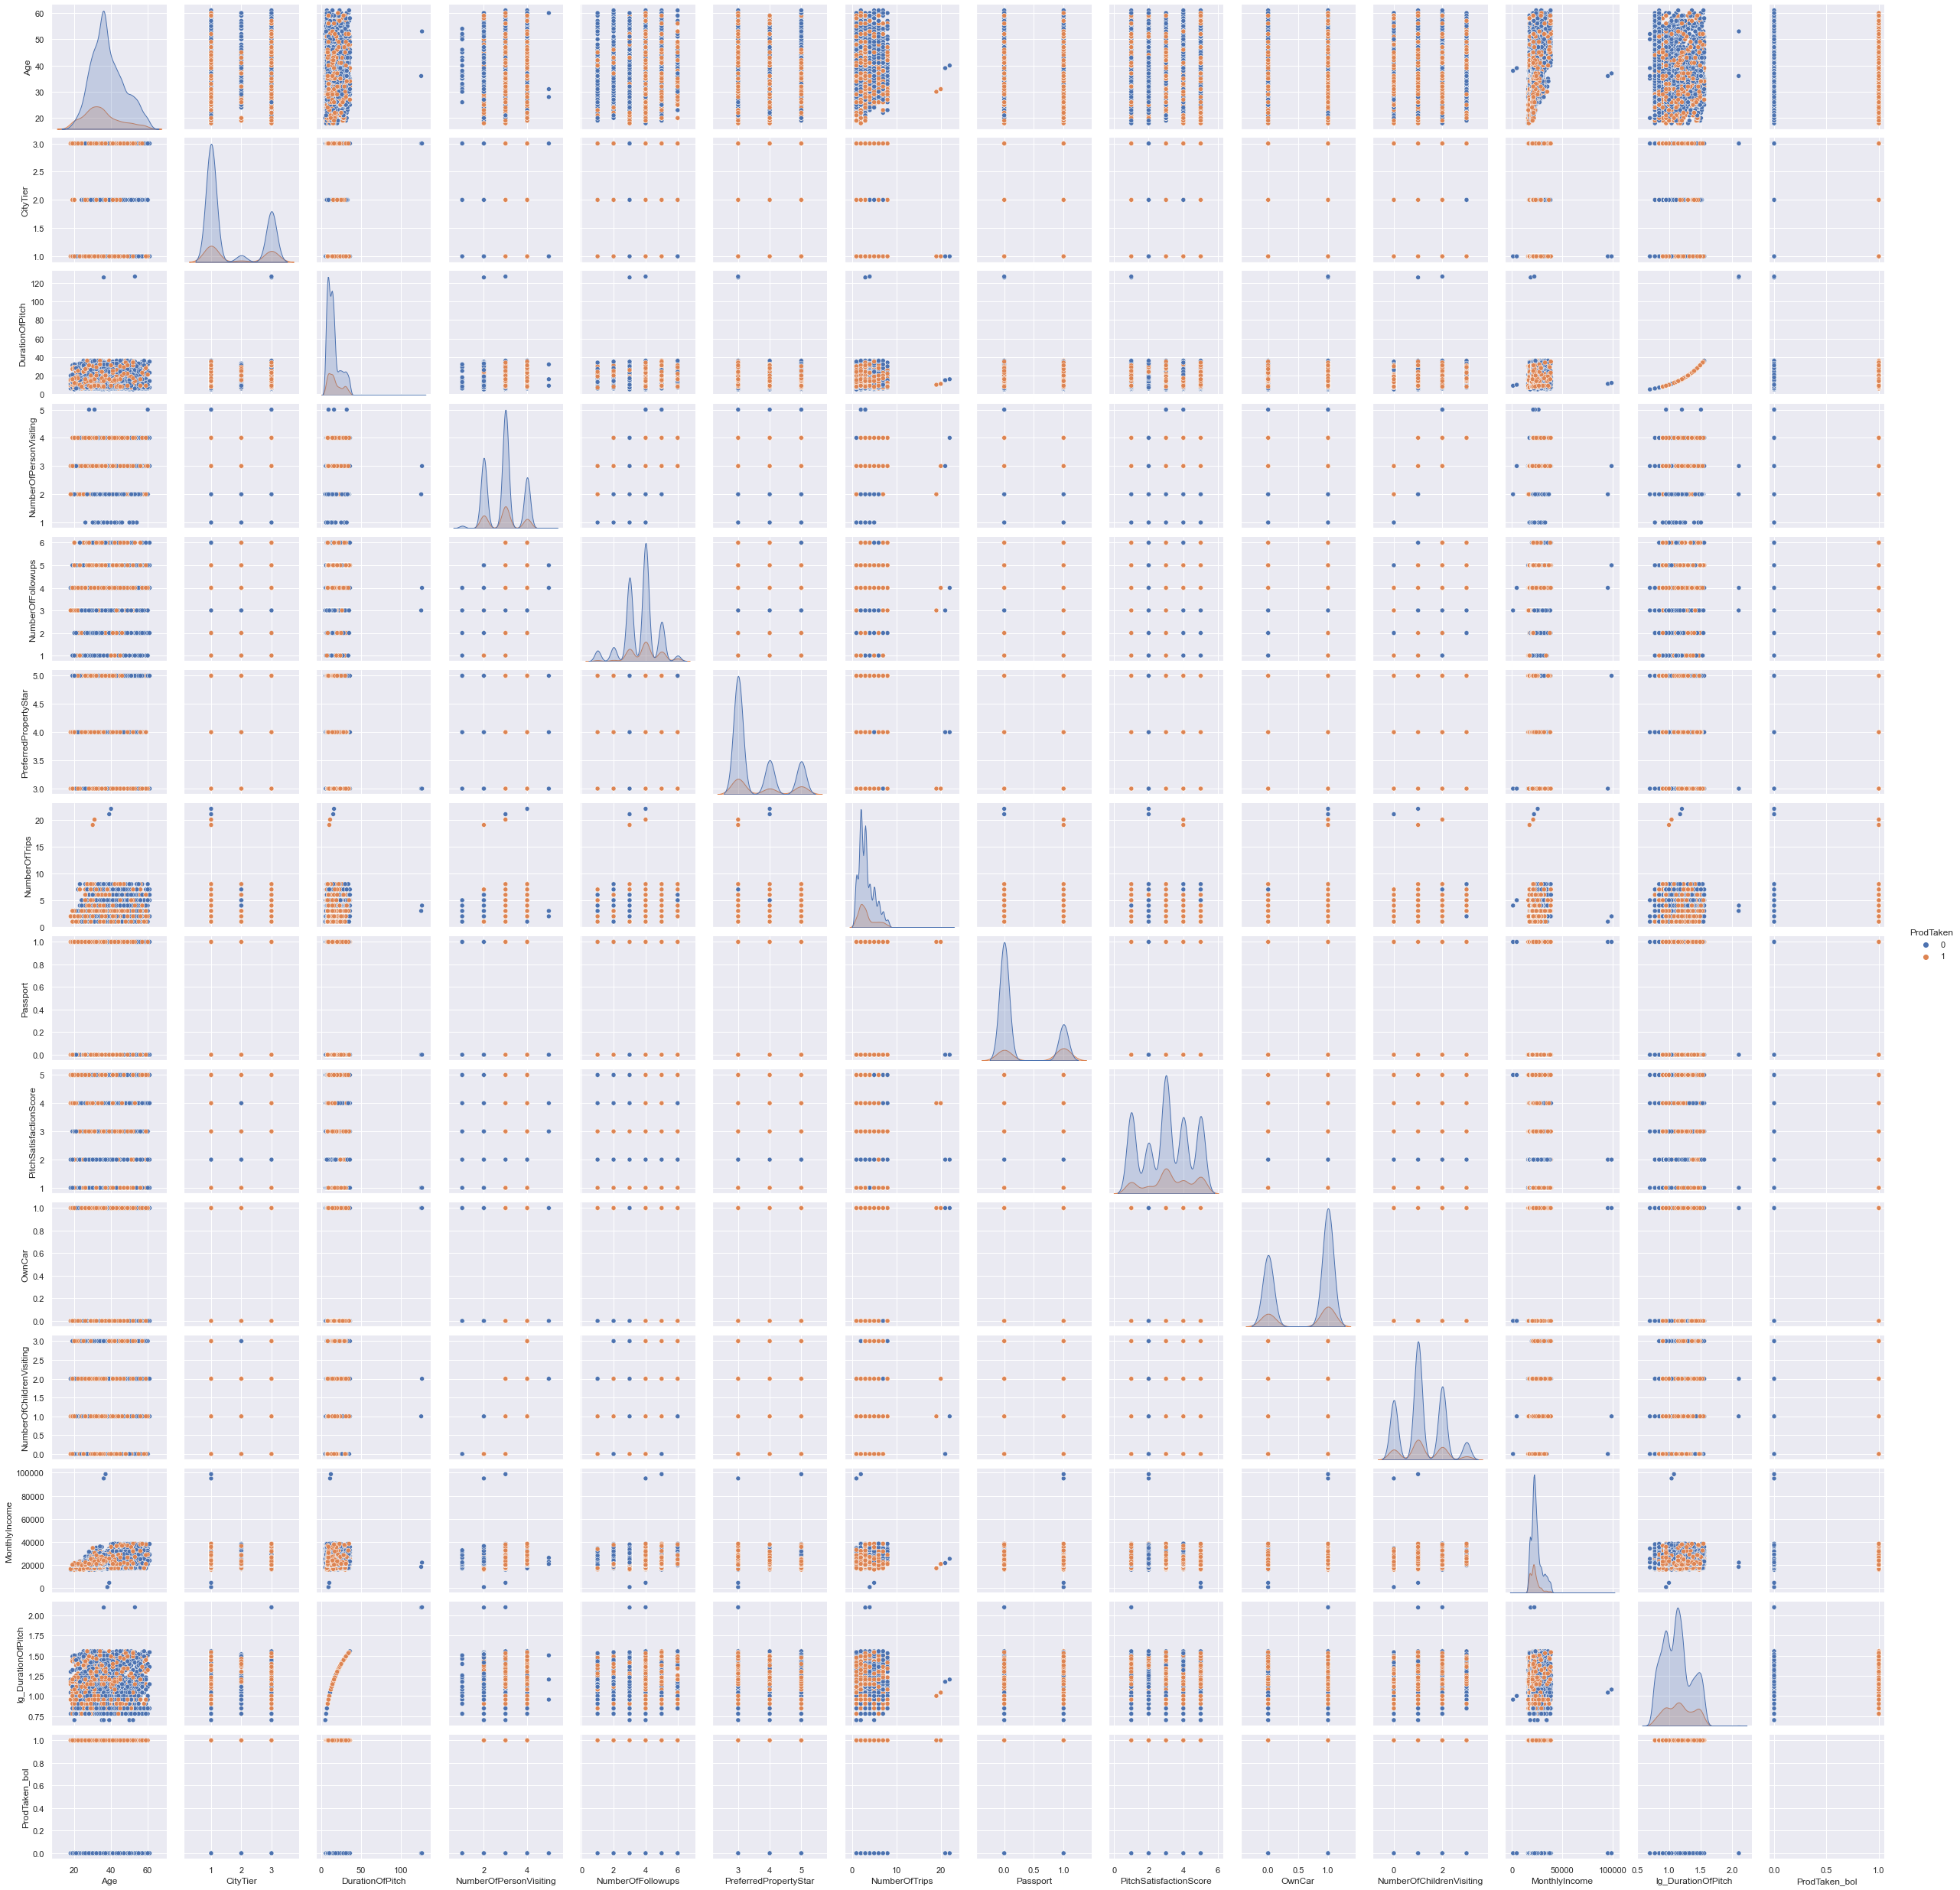

In [46]:
sns.pairplot(df1, hue="ProdTaken")
plt.show()

In [71]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## MaritalStatus v/s ProdTaken

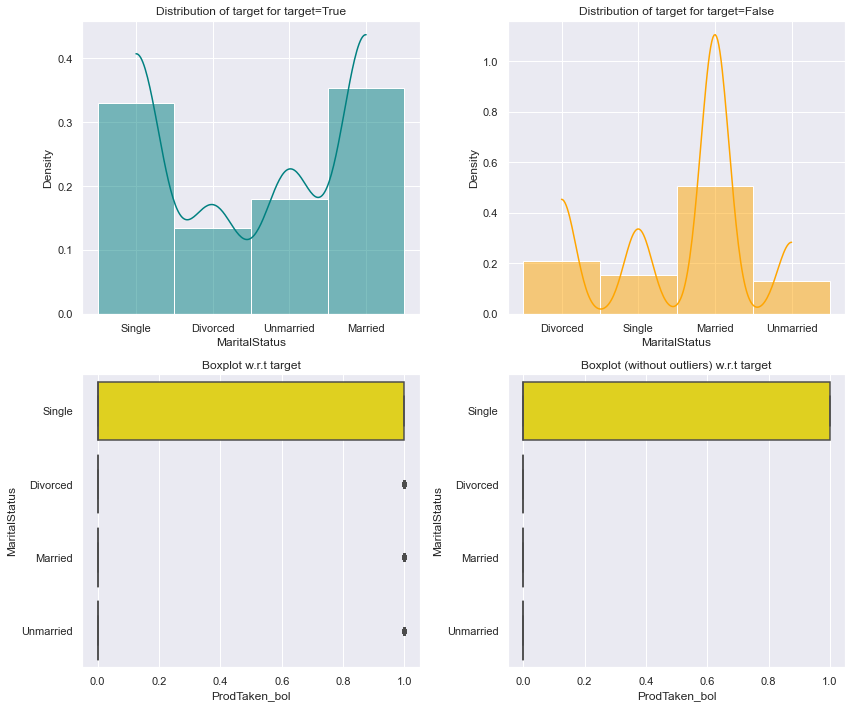

In [72]:
distribution_plot_wrt_target(df1, "MaritalStatus", "ProdTaken_bol")

- Married customers are the most highest purchasers and non purchasers in the observations.

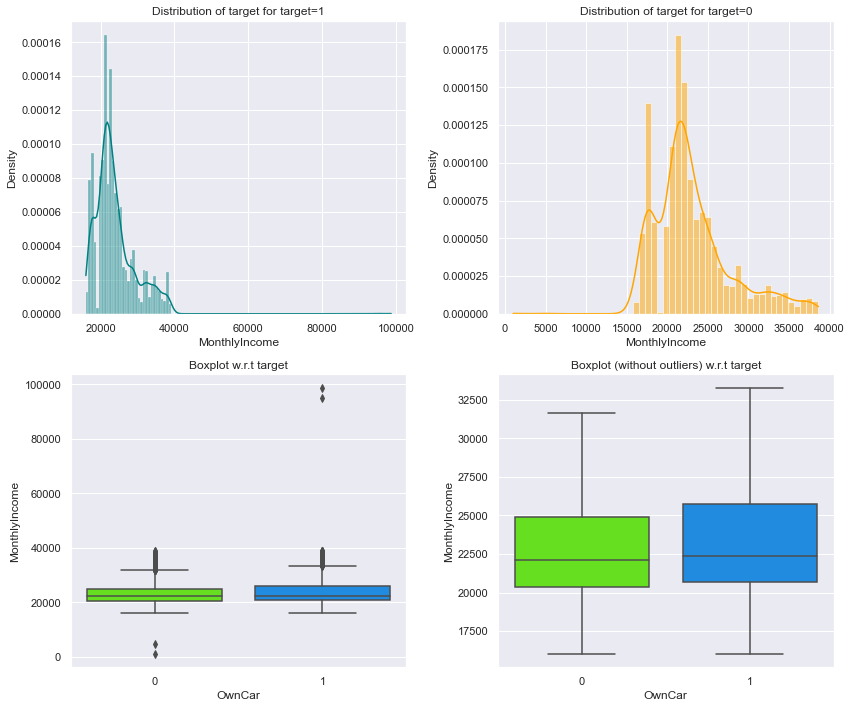

In [49]:
distribution_plot_wrt_target(df1, "MonthlyIncome", "OwnCar")

- Customers who own a car has the highest Monthly income over 25000

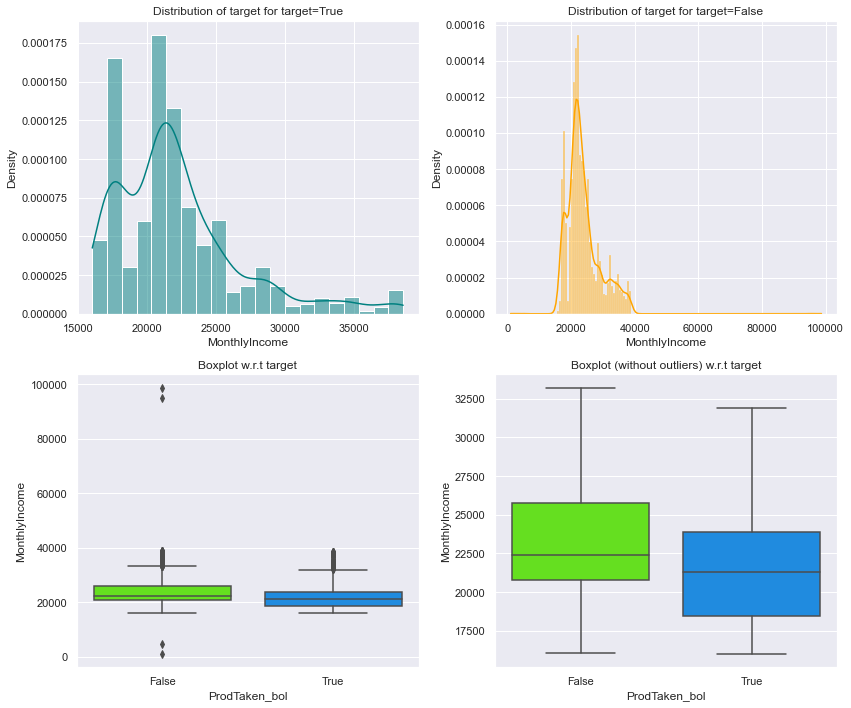

In [73]:
distribution_plot_wrt_target(df1, "MonthlyIncome", "ProdTaken_bol")

- There are a few outliers with income over 35000 who have not bought travel package as per observations.
- There are some customers beyond 22500 who do not purchase travel package as per observations.


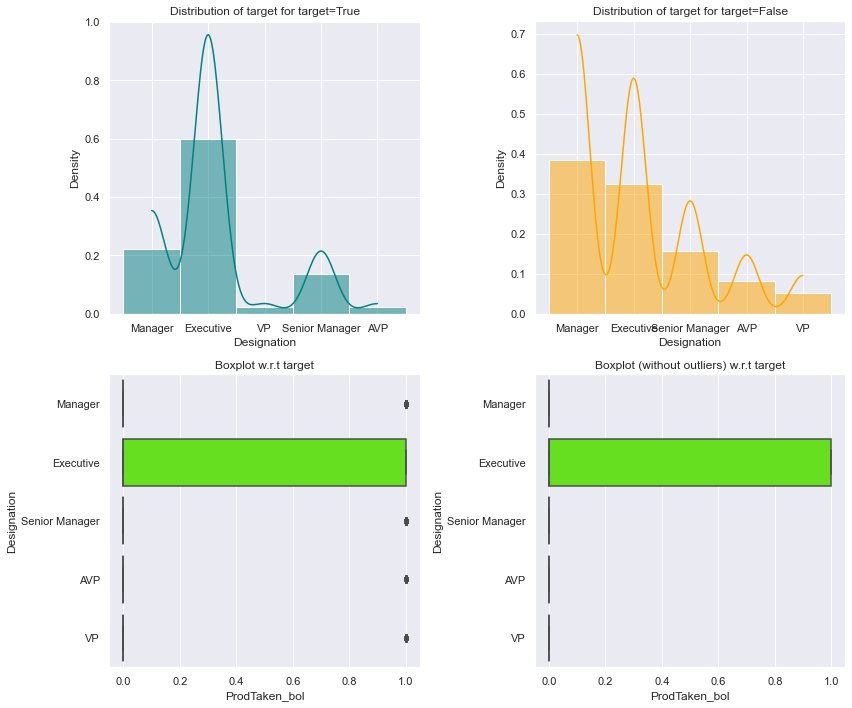

In [74]:
distribution_plot_wrt_target(df1, "Designation", "ProdTaken_bol")

- Executives are the highest purchase of  travel package as per observations.
- Managers are the highest purchase of  travel package as per observations.

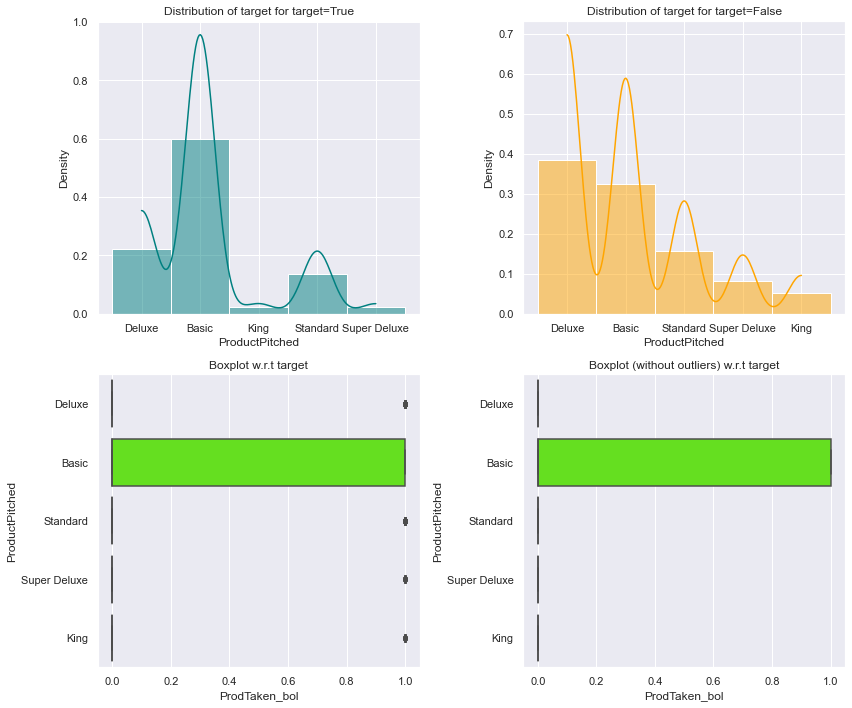

In [75]:
distribution_plot_wrt_target(df1, "ProductPitched", "ProdTaken_bol")

- Customers bought the Basic followed by Deluxe and Standard packages as the product pithched by salesperson.


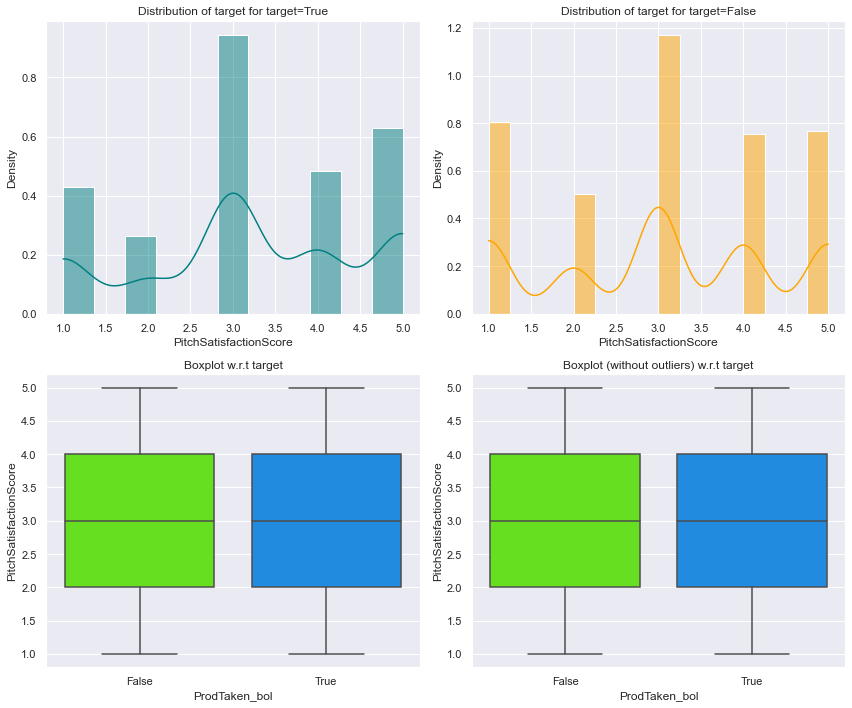

In [76]:
distribution_plot_wrt_target(df1, "PitchSatisfactionScore", "ProdTaken_bol")

- Customers bought the Basic followed by Deluxe and Standard packages as the product pithched by salesperson.


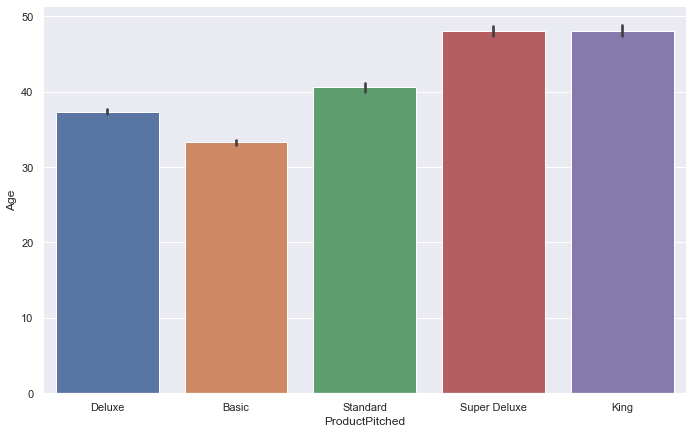

In [77]:
sns.catplot(x="ProductPitched", y="Age", data=df1, kind='bar', height=6, aspect=1.6, estimator=np.mean);

- Customer in the Age of 40+ bought Super Deluxe,King & StandardProductPitched as per the observations.
- Deluxe and Basic products pitched we targeted for Age 40 and below. 

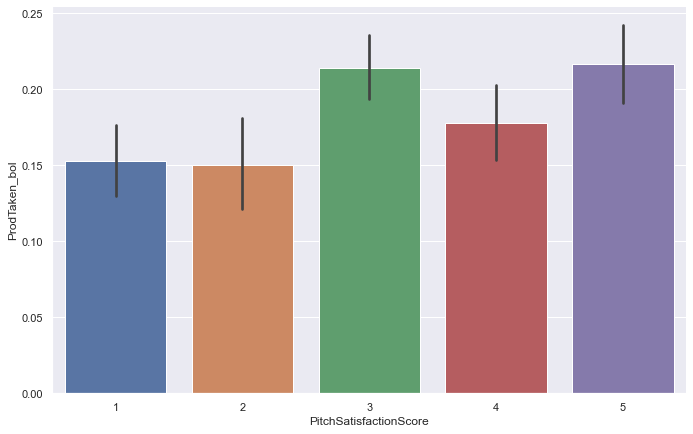

In [78]:
sns.catplot(x="PitchSatisfactionScore", y="ProdTaken_bol", data=df1, kind='bar', height=6, aspect=1.6, estimator=np.mean);

- We can see Customer with PitchSatisfactScore 5 and 3 are the highest package buyers as per the observation 


### SUMMARY OF EDA

**Data Cleaning:**

* Instant is an ID variable so it is dropped from the data.
* Columns Age ,DurationofPitch, NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome   have missing values and needs to be imputed.
* We Imputed Age ,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfChildrenVisiting,MonthlyIncome with median.
* We imputed "Others" as the missing value replacement for TypeofContact

**Observations from EDA:**
- All comments are posted alongside the visualizations.
**Actions for data pre-processing:**
* New boolean varaible ProdTaken_bol was created as a copy of ProdTaken for the visualizations and EDA Analayis.
* The variable ProdTaken_bol was dropped before the model spliting was processed.
* Dataframes data,df,df1 were created in subsequent processing steps.
* Data frame Df1 was used to created all the models.


In [83]:
#Dropping ProdTaken_bol columns from the dataframe and creating df2 for the modeling purpose 
## df1.drop(columns=['ProdTaken_bol'], inplace=True)
df2=df1.copy()

In [227]:
df2.sample(10)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,lg_DurationOfPitch
2981,0,28.0,Company Invited,1,17.0,Salaried,Male,3,4.0,Standard,5.0,Married,3.0,0,3,1,1.0,Senior Manager,27471.0,1.230449
1022,0,36.0,Company Invited,1,11.0,Large Business,Male,2,1.0,Basic,3.0,Single,1.0,0,5,1,0.0,Executive,18500.0,1.041393
3284,0,36.0,Self Enquiry,1,7.0,Small Business,Male,3,5.0,Basic,3.0,Divorced,8.0,0,2,1,2.0,Executive,20936.0,0.845098
2445,0,50.0,Company Invited,1,15.0,Salaried,Male,4,5.0,Deluxe,4.0,Divorced,3.0,0,3,1,3.0,Manager,23808.0,1.176091
1441,0,56.0,Company Invited,1,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Married,2.0,0,3,0,0.0,Manager,21306.0,0.778151
176,0,33.0,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,1.0,0,3,0,1.0,Executive,17500.0,0.903090
3334,0,55.0,Company Invited,1,7.0,Salaried,Female,3,4.0,Standard,3.0,Married,2.0,0,5,1,2.0,Senior Manager,29180.0,0.845098
3022,0,39.0,Company Invited,1,9.0,Salaried,Female,4,2.0,Deluxe,5.0,Unmarried,8.0,1,2,1,3.0,Manager,24658.0,0.954243
1725,0,25.0,Self Enquiry,1,13.0,Salaried,Female,3,3.0,Deluxe,3.0,Married,1.0,0,3,1,1.0,Manager,19898.0,1.113943
1516,0,34.0,Company Invited,3,13.0,Small Business,Male,3,3.0,Deluxe,3.0,Single,1.0,0,5,0,1.0,Manager,19568.0,1.113943


## Split the dataset

- When data (classification) exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 
- This is done by setting the `stratify` parameter to target variable in the train_test_split function

In [228]:
# Separating features and the target column ProdTaken
X = df2.drop('ProdTaken', axis=1)
y = df2['ProdTaken']

## get does create dummies (one hot encoding for all the columns )
X = pd.get_dummies(X, drop_first=True)  ## Drop_first reduces multicolinearity

In [229]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y, shuffle=True)

In [230]:
X_train.shape, X_test.shape
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3421, 30)
Shape of test set :  (1467, 30)
Percentage of classes in training set:
0    0.811751
1    0.188249
Name: ProdTaken, dtype: float64
Percentage of classes in test set:
0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64


- We have 3421 observations in the train set and 1467 observations in the test set.

## Building Models

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer who bought a package wrong(false positive) and/or will result in loss of revenues.


### Which case is more important? 
* Both the cases are important as:

* Predicting a customer who bought a package wrong(false negetive) will result in loss of revenues.

* Predicting a customer who did not buy a package wrong(false positive) can also result wasteful marketing expense.


### How to reduce this loss i.e need to reduce False Negatives?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly. 

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models. 
* The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [231]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [232]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [312]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [234]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


In [235]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [236]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [286]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [238]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

# Model building - Decision Tree,Bagging Classifier,Random Forest

## Decision Tree Model

In [239]:
#Fitting the Traiing model
d_tree = DecisionTreeClassifier(criterion = 'gini',random_state=1)
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [241]:
## Training model performance
dtree_model_train_perf=get_metrics_score(d_tree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8841172460804363
Recall on training set :  1.0
Recall on test set :  0.6811594202898551
Precision on training set :  1.0
Precision on test set :  0.6962962962962963


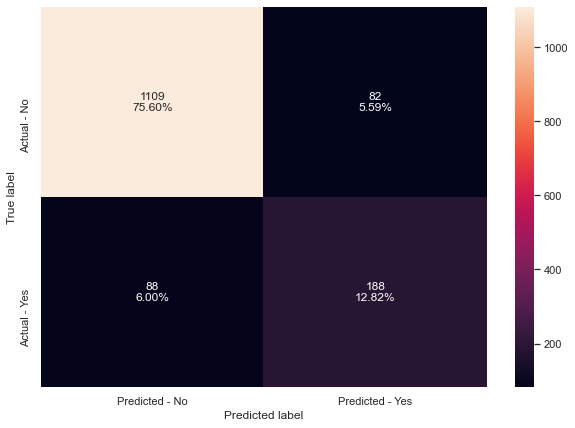

In [242]:
#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

* The decision tree is overfitting the training data as there is a big difference between training and test scores for all the metrics.
* The test recall is very low i.e. only 68%. We need to maximize recall and hence minimize FN to maximize more purchase by
  customers
* Let's see if we can reduce overfitting and improve performance on test data by tuning hyperparameters.

In [305]:
dtree_model_train_perf=model_performance_classification_sklearn(d_tree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [306]:
dtree_model_test_perf=model_performance_classification_sklearn(d_tree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.884117  0.681159   0.696296  0.688645


### Visualizing the Decision Tree

In [243]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome', 'lg_DurationOfPitch', 'TypeofContact_Others', 'TypeofContact_Self Enquiry', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'Gender_Male', 'ProductPitched_Deluxe', 'ProductPitched_King', 'ProductPitched_Standard', 'ProductPitched_Super Deluxe', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Designation_Executive', 'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP']


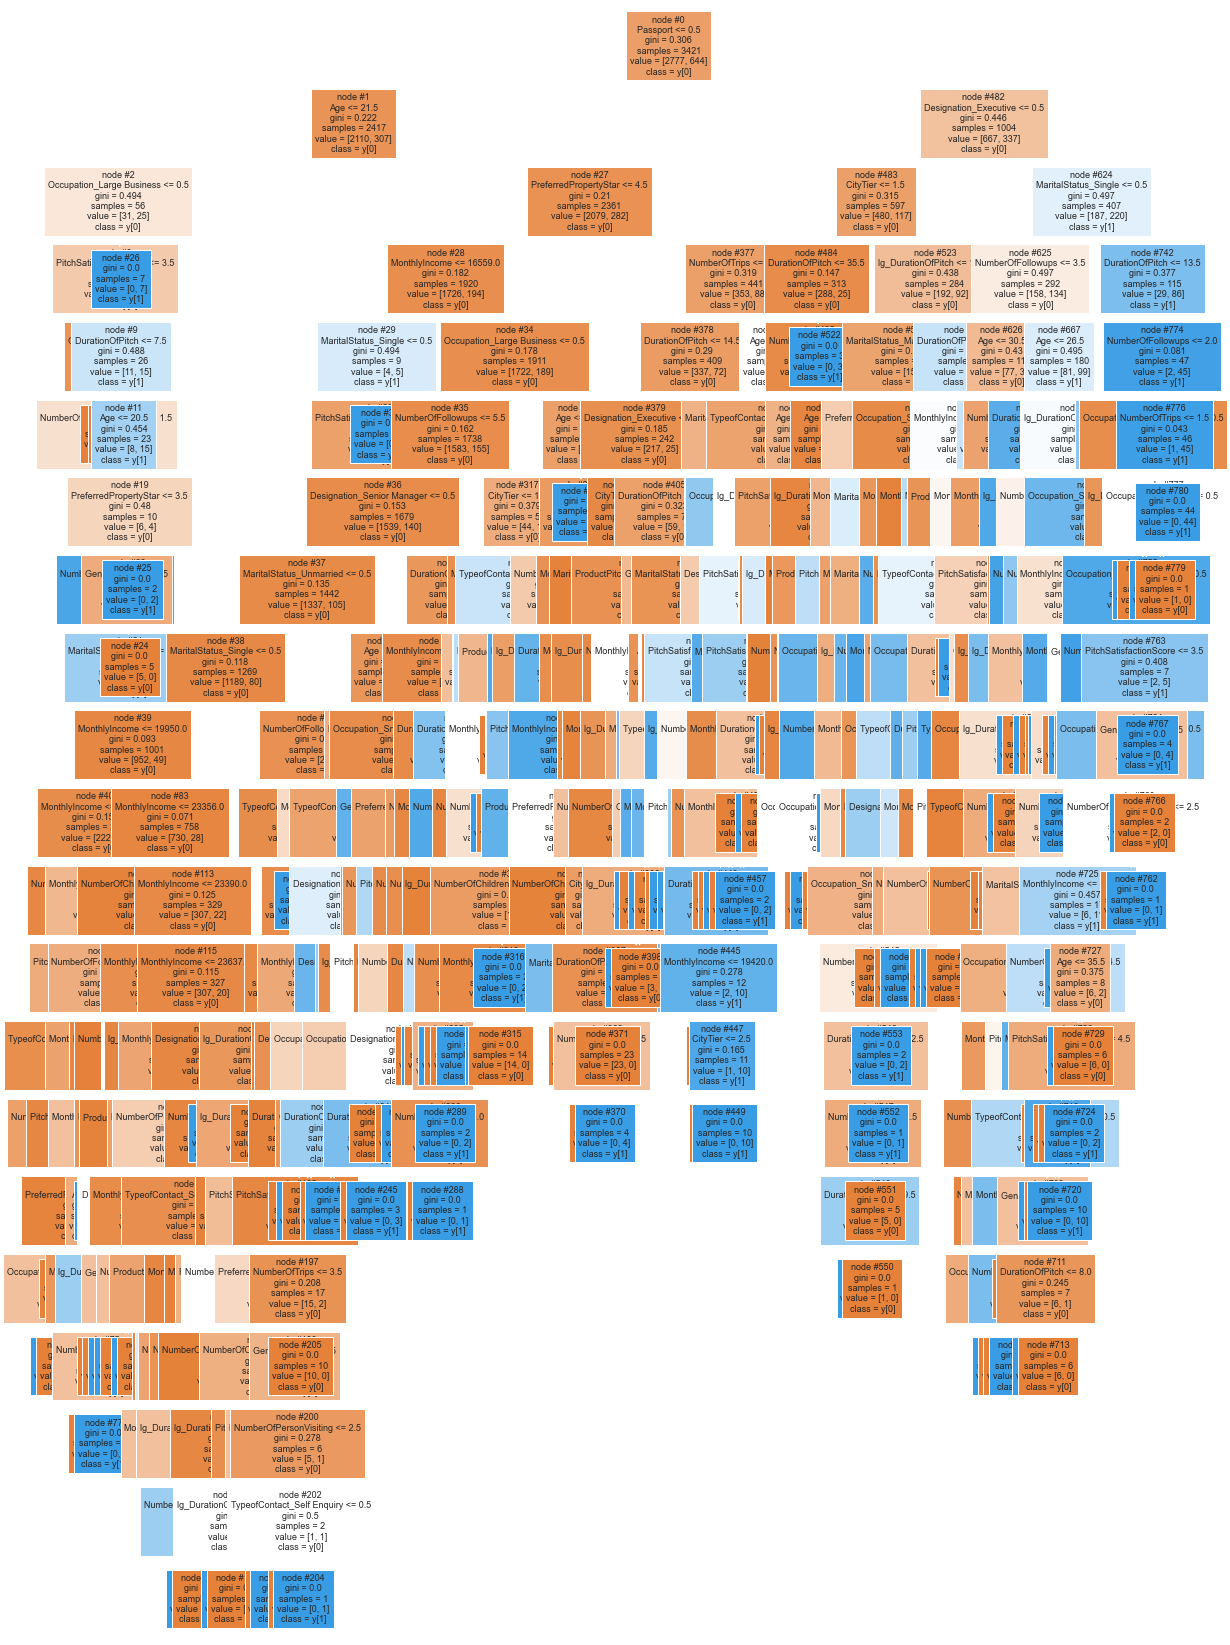

In [244]:
plt.figure(figsize=(20,30))
tree.plot_tree(d_tree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [144]:
# Text report showing the rules of a decision tree -

print(tree.export_text(d_tree,feature_names=feature_names,show_weights=True))

|--- Passport <= 0.50
|   |--- Age <= 21.50
|   |   |--- Occupation_Large Business <= 0.50
|   |   |   |--- PitchSatisfactionScore <= 3.50
|   |   |   |   |--- Gender_Male <= 0.50
|   |   |   |   |   |--- NumberOfChildrenVisiting <= 1.50
|   |   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |   |--- NumberOfChildrenVisiting >  1.50
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |--- Gender_Male >  0.50
|   |   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |   |--- PitchSatisfactionScore >  3.50
|   |   |   |   |--- DurationOfPitch <= 7.50
|   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |--- DurationOfPitch >  7.50
|   |   |   |   |   |--- Age <= 20.50
|   |   |   |   |   |   |--- DurationOfPitch <= 18.00
|   |   |   |   |   |   |   |--- NumberOfFollowups <= 3.50
|   |   |   |   |   |   |   |   |--- Gender_Male <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   

In [245]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(d_tree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Age                          0.140941
MonthlyIncome                0.115453
NumberOfTrips                0.073109
Designation_Executive        0.072029
DurationOfPitch              0.071054
Passport                     0.059067
PitchSatisfactionScore       0.057296
lg_DurationOfPitch           0.057057
CityTier                     0.055988
NumberOfFollowups            0.046930
MaritalStatus_Single         0.035821
Gender_Male                  0.026093
TypeofContact_Self Enquiry   0.026031
PreferredPropertyStar        0.019970
NumberOfChildrenVisiting     0.018128
NumberOfPersonVisiting       0.017723
MaritalStatus_Unmarried      0.017088
Occupation_Small Business    0.016372
Occupation_Large Business    0.014686
OwnCar                       0.012002
MaritalStatus_Married        0.011139
Occupation_Salaried          0.009150
ProductPitched_Deluxe        0.008883
ProductPitched_Standard      0.005869
Designation_Senior Manager   0.003457
TypeofContac

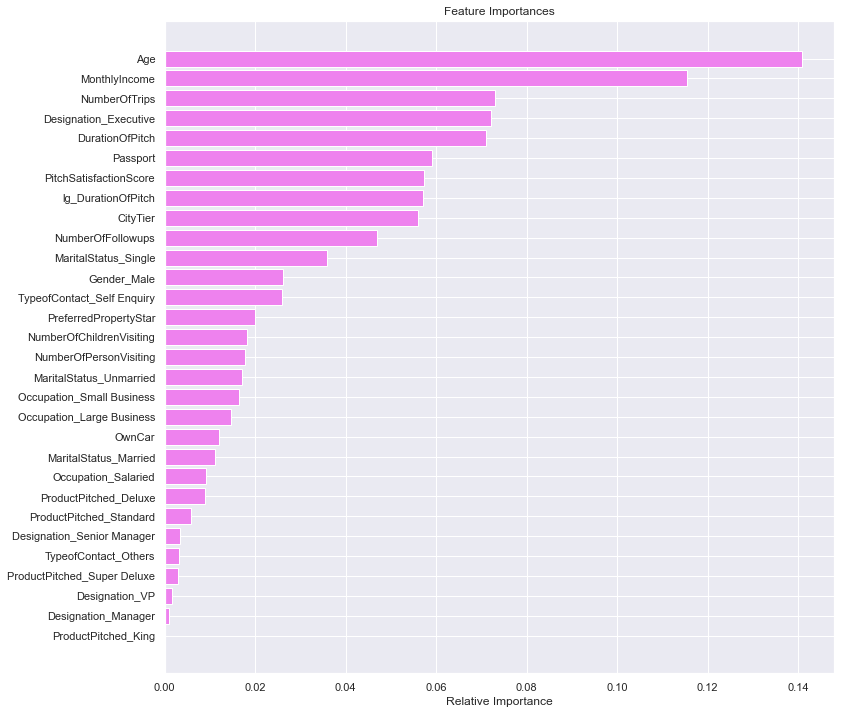

In [246]:
importances = d_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

According to the decision tree model, Age is the most important variable for predicting the customer default.

#### Using GridSearch for Hyperparameter tuning of our tree mode

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

### Hyperparameter Tuning

In [247]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,20), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3,
                       min_impurity_decrease=0.001, random_state=1)

###  Confusion Matrix - decision tree with tuned hyperparameters

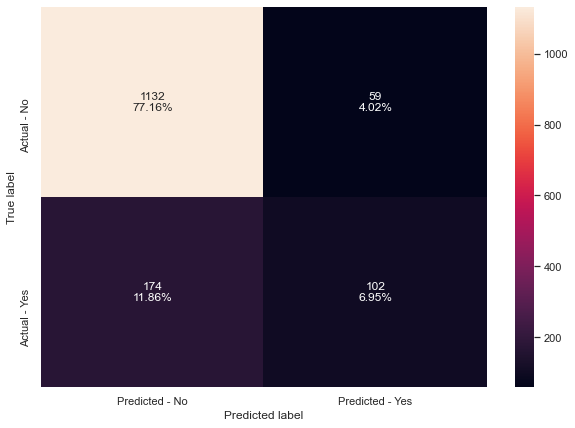

In [248]:
make_confusion_matrix(estimator,y_test)

In [249]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_metrics_score(estimator)

Accuracy on training set :  0.8213972522654195
Accuracy on test set :  0.8411724608043627
Accuracy on training set :  0.8213972522654195
Accuracy on test set :  0.8411724608043627
Recall on training set :  0.3416149068322981
Recall on test set :  0.3695652173913043
Precision on training set :  0.5405405405405406
Precision on test set :  0.6335403726708074


[0.8213972522654195,
 0.8411724608043627,
 0.3416149068322981,
 0.3695652173913043,
 0.5405405405405406,
 0.6335403726708074]

- The overfitting is reduced after hyperparameter tuning as  Recall on training set has reduced from 1 to 0.34 , this is an improvement because now the model is not overfitting and we have a generalized model.
- The Testing set Recall is very close to the training making ita close fit to the training set.
- The Accuracy of the Training and Test is a close match which indicated good fit.

### Visualizing the Hyper parameter Tuned Decision Tree

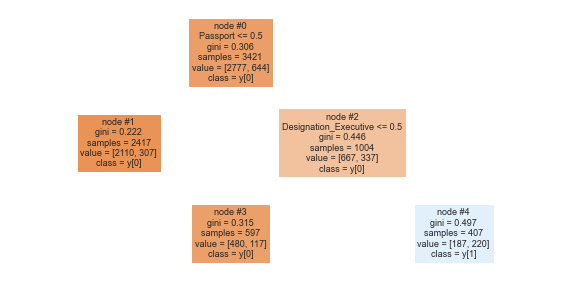

In [250]:
plt.figure(figsize=(10,5))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

**Plotting the feature importance of each variable**

In [251]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Passport                     0.518003
Designation_Executive        0.481997
Age                          0.000000
Occupation_Salaried          0.000000
Designation_Senior Manager   0.000000
Designation_Manager          0.000000
MaritalStatus_Unmarried      0.000000
MaritalStatus_Single         0.000000
MaritalStatus_Married        0.000000
ProductPitched_Super Deluxe  0.000000
ProductPitched_Standard      0.000000
ProductPitched_King          0.000000
ProductPitched_Deluxe        0.000000
Gender_Male                  0.000000
Occupation_Small Business    0.000000
Occupation_Large Business    0.000000
CityTier                     0.000000
TypeofContact_Self Enquiry   0.000000
TypeofContact_Others         0.000000
lg_DurationOfPitch           0.000000
MonthlyIncome                0.000000
NumberOfChildrenVisiting     0.000000
OwnCar                       0.000000
PitchSatisfactionScore       0.000000
NumberOfTrips                0.000000
PreferredPro

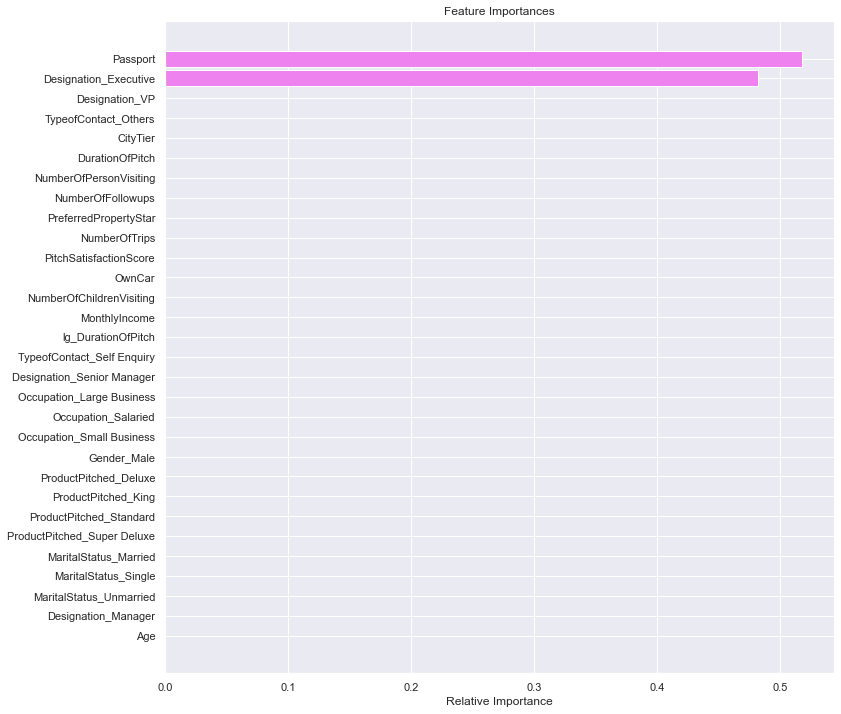

In [252]:
feature_names = X_train.columns
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* You can see in important features of previous model, but here importance of Age variable is back
* This shows that hyperparameter tuning using Grid Search is better than randomly limiting a Hyperparameter

### Bagging Classifier

In [253]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [254]:
## Training set performance of unconstrained  bagging model 
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.994154  0.970497   0.998403  0.984252


In [255]:
## Testing set performance of unconstrained bagging model 
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.913429  0.612319    0.89418  0.726882


* Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of recall and F1  
  score  .

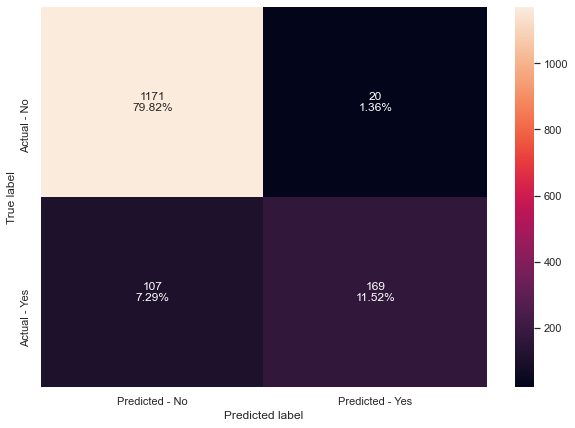

In [256]:
#Creating confusion matrix
make_confusion_matrix(bagging,y_test)

**Bagging Classifier with weighted decision tree**

In [257]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.17,
                                                                      1: 0.83},
                                                        random_state=1),
                  random_state=1)

In [258]:
## Training set performance of weighted bagging model 
bagging_model_train_perf=model_performance_classification_sklearn(bagging_wt, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.993861  0.970497    0.99681  0.983478


In [259]:
## Testing set performance of weighted bagging model 
bagging_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.900477  0.536232   0.891566  0.669683


    *** Bagging classifier with a weighted decision tree is giving very good accuracy and prediction but is not able to generalize well on test data in terms of recall.

## Hyperparameter Tuning

### Bagging Classifier

**Some of the important hyperparameters available for bagging classifier are:**

- base_estimator: The base estimator to fit on random subsets of the dataset. If None(default), then the base estimator is a decision tree.
- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- bootstrap_features: If it is true, then features are drawn with replacement. Default value is False.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

**Tuning Bagging Classifier**

In [260]:
# GRID search for bagging classifier with Hyper Parameters
cl1 = DecisionTreeClassifier(class_weight={0:0.17,1:0.83},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall')
grid.fit(X_train, y_train)

GridSearchCV(estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.17,
                                                                                 1: 0.83},
                                                                   random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [261]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.17,
                                                                      1: 0.83},
                                                        random_state=1),
                  max_features=1, n_estimators=51, random_state=1)

In [263]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.3478515054077755
Accuracy on test set :  0.3265167007498296
Recall on training set :  0.9767080745341615
Recall on test set :  0.9710144927536232
Precision on training set :  0.2210896309314587
Precision on test set :  0.21474358974358973


In [264]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_estimator,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.347852  0.976708    0.22109  0.360562


In [265]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.326517  0.971014   0.214744  0.351706


* Bagging classifier with a Hyperparameter tuned decision tree is giving very good recall but bad overall accuracy & F1.
  cl1 = DecisionTreeClassifier(class_weight={0:0.17,1:0.83},random_state=1)
      'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }
*  The Hyperparameter tuned decision tree is not able to generalize well on test data in terms of over all model.

## Random Forest Model

In [266]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

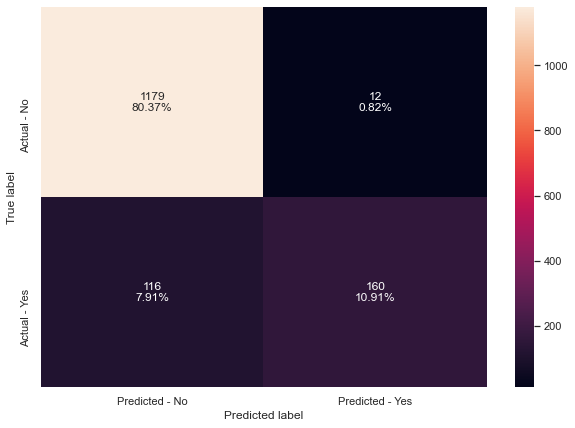

In [267]:
## confusion_matrix_sklearn(rf,X_test,y_test)
#Creating confusion matrix
make_confusion_matrix(rf,y_test)

In [268]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [303]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


**Random forest with class weights**

In [272]:
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

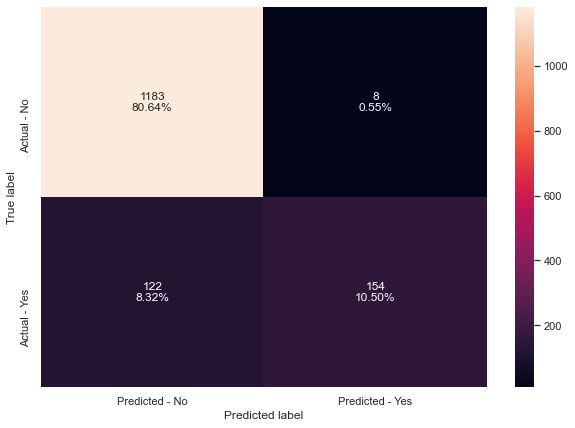

In [274]:
## confusion_matrix_sklearn(rf_wt, X_test,y_test)
make_confusion_matrix(rf_wt,y_test)

In [275]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [276]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.911384  0.557971   0.950617  0.703196


- Random forest weighted classifier is giving a good Accuracy but the recall is down from the unconstrainted RF model. 
- The training data is defnitely overfitted
- Let's try to reduce this overfitting by hyperparameter tuning.

### Hyperparameter Tuning

In [283]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features=0.9, n_estimators=110, random_state=1)

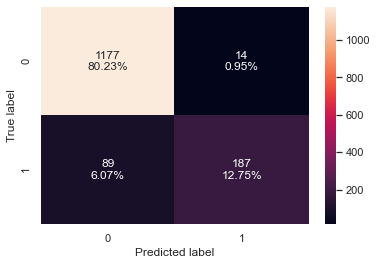

In [288]:
confusion_matrix_sklearn(rf_estimator, X_test,y_test)
##make_confusion_matrix(rf_tuned,y_test)

In [290]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [291]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.929789  0.677536   0.930348  0.784067


- No significant change in the result. The result is almost the same before or after the hyperparameter tuning.
- The recall went up to 0.677536 from 0.557971. The FP went up but FN went down 

In [292]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.135586
Age                          0.125521
DurationOfPitch              0.068603
lg_DurationOfPitch           0.065719
Passport                     0.064252
NumberOfTrips                0.061156
Designation_Executive        0.057699
NumberOfFollowups            0.053766
PitchSatisfactionScore       0.052807
CityTier                     0.045572
PreferredPropertyStar        0.033873
MaritalStatus_Single         0.027760
NumberOfChildrenVisiting     0.023645
NumberOfPersonVisiting       0.021294
TypeofContact_Self Enquiry   0.019696
Gender_Male                  0.019374
MaritalStatus_Unmarried      0.017918
Occupation_Large Business    0.016937
OwnCar                       0.015173
MaritalStatus_Married        0.013944
Occupation_Small Business    0.013097
Occupation_Salaried          0.012924
Designation_Manager          0.007441
ProductPitched_Deluxe        0.007190
ProductPitched_Standard      0.006217
Designation_

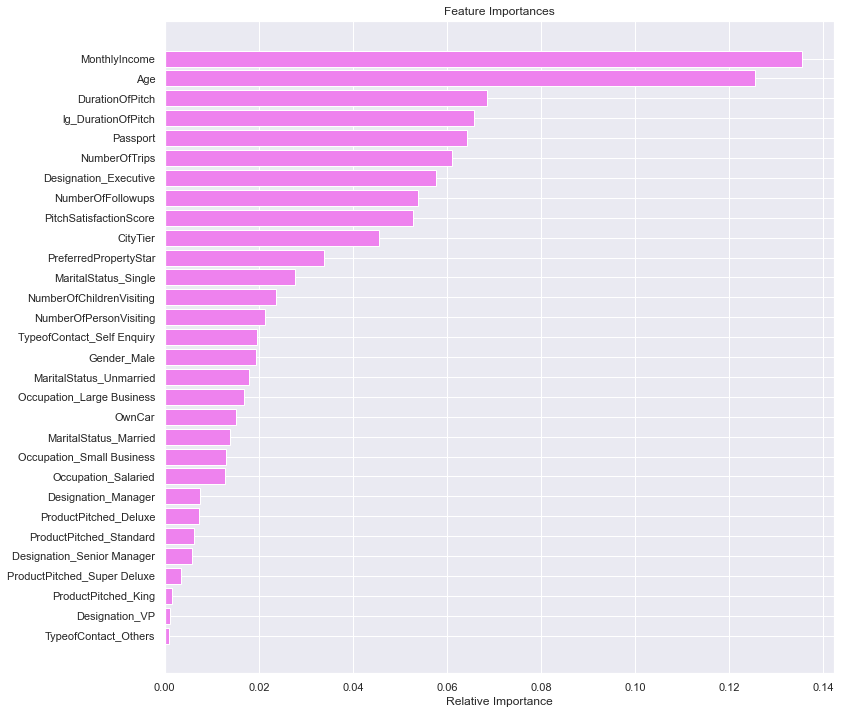

In [293]:
feature_names = X_train.columns
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Monthly Income & Age are the most important features,for the tuned random forest model.

#### Comparing all the models

In [308]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,
    bagging_model_train_perf.T, bagging_wt_model_train_perf.T,rf_model_train_perf.T,
    rf_wt_model_train_perf.T,bagging_model_train_perf.T,bagging_wt_model_train_perf.T,
     rf_estimator_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
     "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Estimator"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,Bagging Classifier,Weighted Bagging Classifier,Random Forest Estimator
Accuracy,1.0,0.993861,0.347852,1.0,1.0,0.993861,0.347852,1.0
Recall,1.0,0.970497,0.976708,1.0,1.0,0.970497,0.976708,1.0
Precision,1.0,0.996810,0.221090,1.0,1.0,0.996810,0.221090,1.0
F1,1.0,0.983478,0.360562,1.0,1.0,0.983478,0.360562,1.0


In [309]:
# Test set performance comparison of all models 

models_train_comp_df = pd.concat(
    [dtree_model_test_perf.T,
    bagging_model_test_perf.T, bagging_wt_model_test_perf.T,rf_model_test_perf.T,
    rf_wt_model_test_perf.T,bagging_model_test_perf.T,bagging_wt_model_test_perf.T,
     rf_estimator_model_test_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
     "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Estimator"]
print("Test performance comparison:")
models_train_comp_df

Test performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,Bagging Classifier,Weighted Bagging Classifier,Random Forest Estimator
Accuracy,0.884117,0.900477,0.326517,0.912747,0.911384,0.900477,0.326517,0.929789
Recall,0.681159,0.536232,0.971014,0.579710,0.557971,0.536232,0.971014,0.677536
Precision,0.696296,0.891566,0.214744,0.930233,0.950617,0.891566,0.214744,0.930348
F1,0.688645,0.669683,0.351706,0.714286,0.703196,0.669683,0.351706,0.784067


* Decision tree  and bagging Classifier performed well on training and test set but had over fitting 
* Bagging classifier overfitted the data before and after tuning.
* Random Forest with default parameters performed same as after tuning.Among the 3 Random Forest Estimator(tuned) gave the best proformance.
* As the final results depend on the parameters used/checked using GridSearchCV, There may be yet better parameters which may result in a better performance.

## Boosting Models

### AdaBoost Regressor

   Accuracy    Recall  Precision        F1
0  0.843905  0.319876   0.682119  0.435518
   Accuracy    Recall  Precision        F1
0  0.849352  0.326087       0.72  0.448878


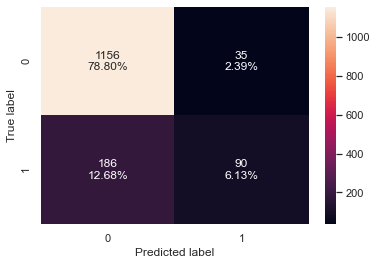

In [318]:
#Fitting the AdaBoost Classifermodel
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

* Adaboost is giving more generalized performance than previous models but the test f1-score is too low. 

### Hyperparameter Tuning

In [320]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.8, n_estimators=90, random_state=1)

   Accuracy    Recall  Precision        F1
0  0.974277  0.889752   0.971186  0.928687
   Accuracy    Recall  Precision       F1
0  0.874574  0.612319   0.686992  0.64751


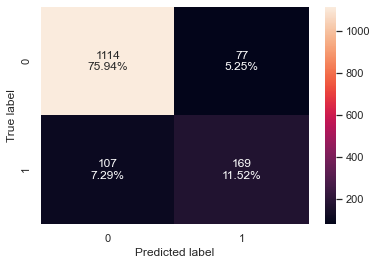

In [321]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

*  We can see that there is significant improvement in the Training model after hyperparameter tuning.
*  The Recall is higher but precision is lower and the tunes Adaboost classifier has started overfitting the Training data.


In [323]:
# importance of features in the tree building

print(pd.DataFrame(abc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.292217
Age                          0.153584
DurationOfPitch              0.060687
PitchSatisfactionScore       0.058355
lg_DurationOfPitch           0.050601
NumberOfFollowups            0.050389
NumberOfTrips                0.043332
Passport                     0.033010
CityTier                     0.030130
Gender_Male                  0.027682
PreferredPropertyStar        0.023088
Designation_Executive        0.017324
TypeofContact_Self Enquiry   0.017070
Occupation_Salaried          0.016676
ProductPitched_Super Deluxe  0.016084
MaritalStatus_Single         0.015734
Occupation_Large Business    0.015578
NumberOfChildrenVisiting     0.014447
MaritalStatus_Unmarried      0.010419
ProductPitched_Deluxe        0.010264
Designation_Manager          0.007545
NumberOfPersonVisiting       0.007218
Occupation_Small Business    0.006097
OwnCar                       0.006043
ProductPitched_Standard      0.004672
Designation_

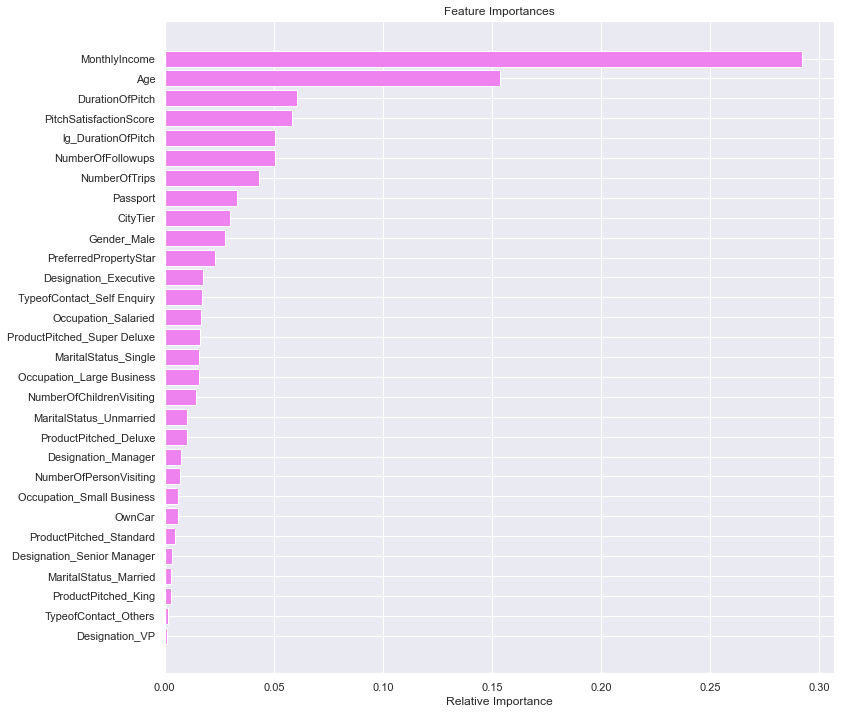

In [324]:
feature_names = X_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Monthly Income & Age is the most important features here.

### Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.885414  0.444099    0.89375  0.593361
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.867757  0.394928   0.801471  0.529126


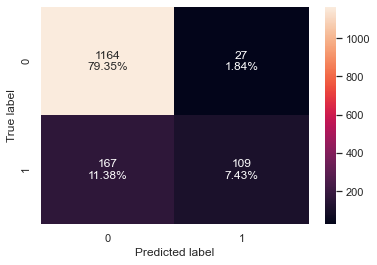

In [325]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

* The gradient boosting classifier is NOT overfitting the training data but the F1 Score of Test performance is too low.
* Lets do some Hyperparameter tuning.

### Hyperparameter Tuning

In [326]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.9)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.924876  0.63354   0.951049  0.760485
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.884117  0.496377   0.815476  0.617117


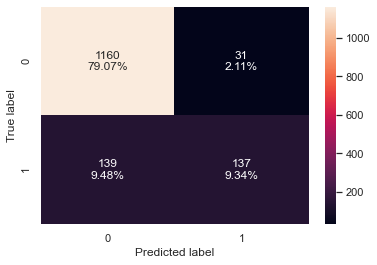

In [327]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

* There is not much difference in the model performance after hyperparameter tuning.
* The test model accuracy has gone up, but the F1 Score is still too low.
* The tuned GB classifier model is still overfitting the Traning data.

In [328]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gbc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.187546
Age                          0.128734
Passport                     0.118716
Designation_Executive        0.085603
CityTier                     0.057971
lg_DurationOfPitch           0.054656
NumberOfFollowups            0.053271
MaritalStatus_Single         0.051093
NumberOfTrips                0.045507
DurationOfPitch              0.041019
PreferredPropertyStar        0.032864
PitchSatisfactionScore       0.031541
MaritalStatus_Unmarried      0.024992
TypeofContact_Self Enquiry   0.011849
Occupation_Large Business    0.011068
Designation_Senior Manager   0.010040
NumberOfPersonVisiting       0.007715
Gender_Male                  0.006499
ProductPitched_Super Deluxe  0.005831
Designation_Manager          0.005786
NumberOfChildrenVisiting     0.005668
ProductPitched_Standard      0.005175
ProductPitched_Deluxe        0.003412
Occupation_Small Business    0.002943
OwnCar                       0.002925
Occupation_S

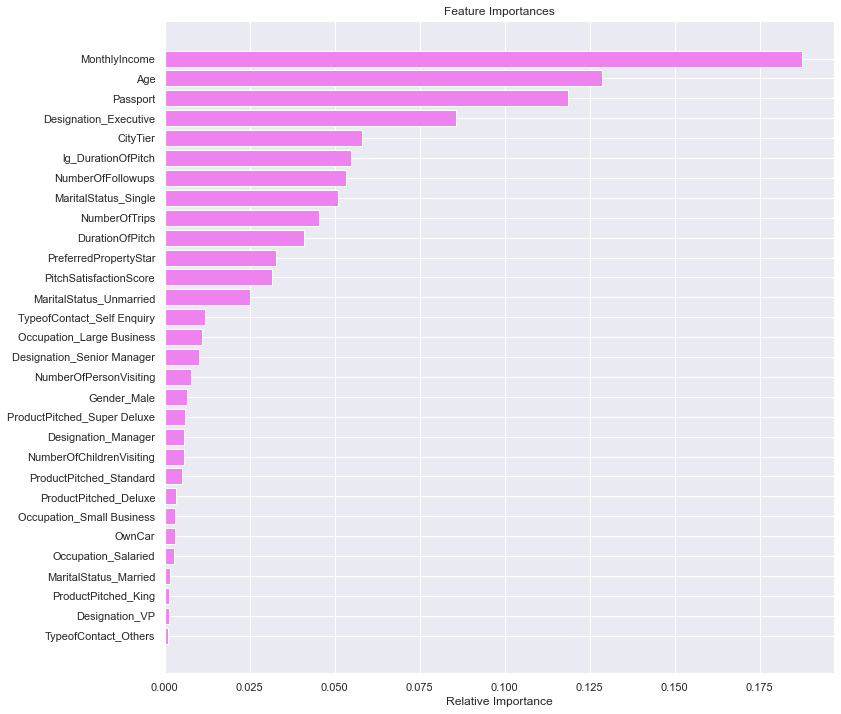

In [329]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Monthly Income,Age & PAssport is the most important features here.

### XGBoost Regressor

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999415  0.996894        1.0  0.998445
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.925017  0.684783   0.891509  0.77459


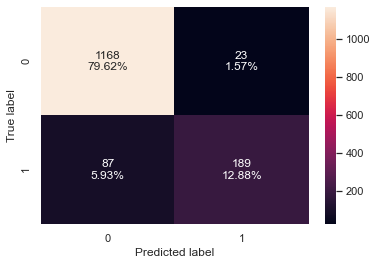

In [332]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

* XGBoost with default parameters is overfitting the training model.
* Let's try hyperparameter tuning and see if the model performance improves.  

### Hyperparameter Tuning

In [333]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.974277  0.995342    0.88292  0.935766
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.899796  0.815217   0.700935  0.753769


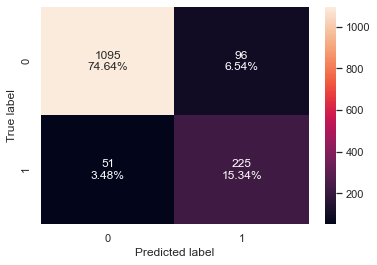

In [334]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

* The overfitting has reduced slightly but there is not much difference in the model performance.
* The recall went up in the tuned XGBoosted model but precision went down.

In [335]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Passport                     0.139847
Designation_Executive        0.094679
ProductPitched_Super Deluxe  0.056133
MaritalStatus_Single         0.053401
CityTier                     0.052300
MaritalStatus_Married        0.049967
MaritalStatus_Unmarried      0.046874
PreferredPropertyStar        0.035065
ProductPitched_Standard      0.033105
Occupation_Large Business    0.032916
Age                          0.032502
NumberOfTrips                0.032291
NumberOfFollowups            0.031257
DurationOfPitch              0.030926
Occupation_Small Business    0.029915
ProductPitched_Deluxe        0.028690
PitchSatisfactionScore       0.028423
Occupation_Salaried          0.026825
MonthlyIncome                0.026550
ProductPitched_King          0.025864
Gender_Male                  0.024496
TypeofContact_Self Enquiry   0.022416
OwnCar                       0.018986
NumberOfChildrenVisiting     0.015875
TypeofContact_Others         0.015508
NumberOfPers

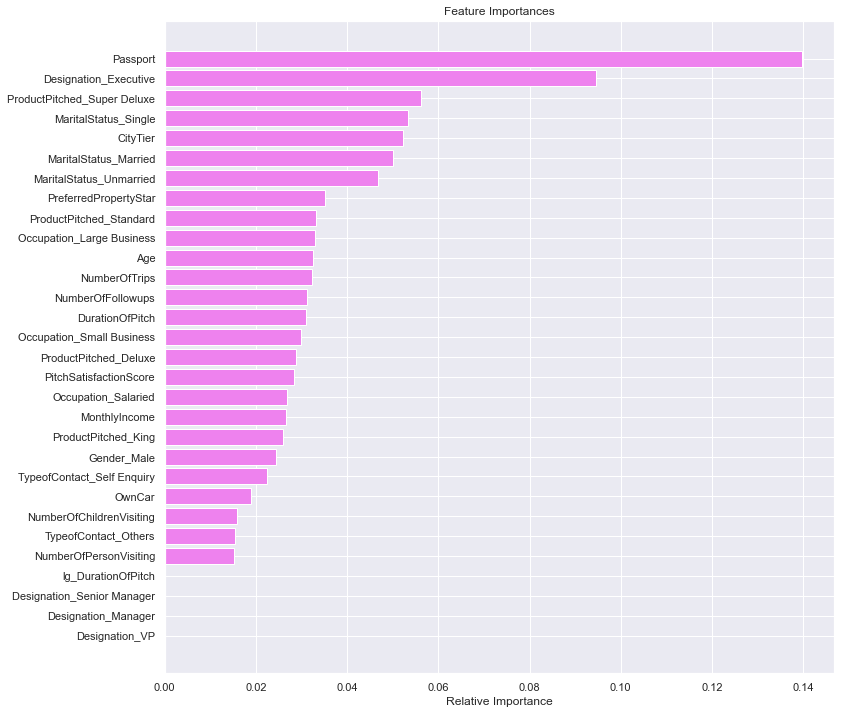

In [336]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- In XGBoost, Passpost and Designation_Executive are the most important features.

## Stacking Model

**Now, let's build a stacking model with the tuned models - decision tree, random forest, and gradient boosting, then use XGBoost to get the final prediction.**

In [340]:
estimators = [('Random Forest',rf_estimator), ('Gradient Boosting',gbc_tuned), ('Decision Tree',d_tree)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_features=0.9,
                                                       n_estimators=110,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=250,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Decision Tree',
                                DecisionTreeClassifier(random_state=1))],
                   final_estimator=XGBC...
                                                 gpu_id=-1,
                                                

Training performance:
    Accuracy  Recall  Precision        F1
0  0.994154     1.0    0.96988  0.984709
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.907294  0.880435   0.702312  0.78135


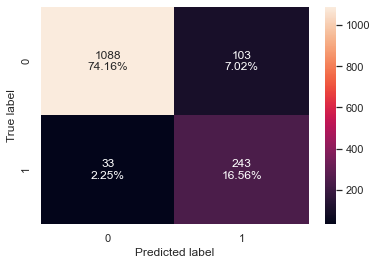

In [341]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

* The stacking classifier is giving a similar performance as compared to XGBoost tuned classifier with similar overfitting.

## Comparing all models

In [351]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T, rf_model_train_perf.T,rf_wt_model_train_perf.T,
    ab_classifier_model_train_perf.T,abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,
    xgb_classifier_model_train_perf.T,xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "XGB Classifier",
    "XGB Tuned",
    "Stacking Classifier"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Random Forest Estimator,Random Forest Tuned,Adaboost Regressor,Adaboost Tuned,Gradient Boost Estimator,Gradient Boost Tuned,XGB Classifier,XGB Tuned,Stacking Classifier
Accuracy,1.0,1.0,1.0,0.843905,0.974277,0.885414,0.924876,0.999415,0.974277,0.994154
Recall,1.0,1.0,1.0,0.319876,0.889752,0.444099,0.633540,0.996894,0.995342,1.000000
Precision,1.0,1.0,1.0,0.682119,0.971186,0.893750,0.951049,1.000000,0.882920,0.969880
F1,1.0,1.0,1.0,0.435518,0.928687,0.593361,0.760485,0.998445,0.935766,0.984709


In [352]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T, rf_model_test_perf.T,rf_wt_model_test_perf.T,
    ab_classifier_model_test_perf.T,abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,
    xgb_classifier_model_test_perf.T,xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "XGB Classifier",
    "XGB Tuned",
    "Stacking Classifier"
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Random Forest Estimator,Random Forest Tuned,Adaboost Regressor,Adaboost Tuned,Gradient Boost Estimator,Gradient Boost Tuned,XGB Classifier,XGB Tuned,Stacking Classifier
Accuracy,0.884117,0.912747,0.911384,0.849352,0.874574,0.867757,0.884117,0.925017,0.899796,0.907294
Recall,0.681159,0.579710,0.557971,0.326087,0.612319,0.394928,0.496377,0.684783,0.815217,0.880435
Precision,0.696296,0.930233,0.950617,0.720000,0.686992,0.801471,0.815476,0.891509,0.700935,0.702312
F1,0.688645,0.714286,0.703196,0.448878,0.647510,0.529126,0.617117,0.774590,0.753769,0.781350


* The majority of the models are overfitting the training data in terms of f1-score.
* The Stacking classifier is giving the highest f1-score on the test data but is overfitting the training data.
* The XGB Classifier has given the second-highest test f1-score and is giving a smilar performance with Traning data Overfitted for both. 

### Feature importance of XGBoost classifier (compared to Stacking Classifier)

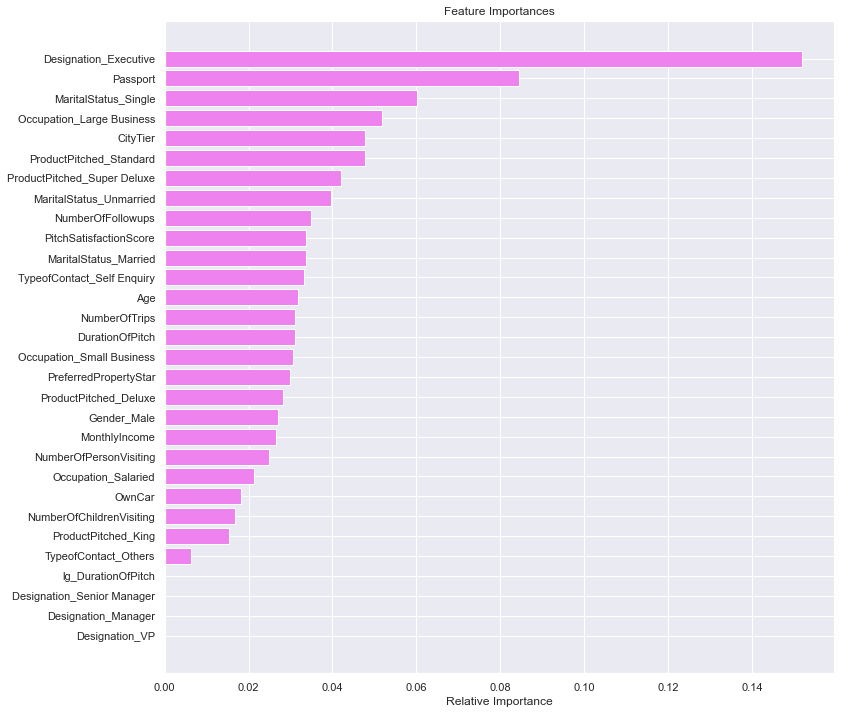

In [356]:
feature_names = X_train.columns
importances = xgb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

*  For XGBoost Classifier the features Passpost and Designation_Executive are the most important features.

##  ***  Actionable Insights & Recommendations ***

- Salaried with 48.4% & Small business customers with 42.6% has the second highest from the observations. 
- Customer who are salaried and have small business has the higest possibility of purchasing travel packages.
- Customers who are Executives has the highest population with 37.7% observations,hence are more like to purchase Travel
  packages.
 - Customers who are Married and Single are most likely to purchase travel packages.
 - There are some customers beyond 22500 who do not purchase travel package as per observations.
 - Customers bought the Basic followed by Deluxe and Standard packages as the product pitched by salesperson.
 - Deluxe and Basic products pitched we targeted for Age 40 and below. 
 - We can see Customer with PitchSatisfactScore 5 and 3 are the highest package buyers as per the observations.
 - The PreferredProperty for customers is 3 star hotels  followed by 5 and 4 stars.
 - As per the XGBoost Classifier the features Passpost and Designation_Executive are the most important features.